# Assignment 4 (CL7-B): K - Means Clustering using Python
### Roll No.: 43141
### Class: BE - 9
### Batch: R - 9

In [1]:
import numpy as np # For linear algebra
import pandas as pd # Data processing and reading .csv files
import os
import matplotlib.pyplot as plt
import seaborn as sns

#### Reading the dataset

In [2]:
data = pd.read_csv("E:/College/CL7/Assignment8/Python/Mall_Customers.csv")

In [3]:
data.head()

,CustomerID,Gender,Age,Annual_Income_(k$),Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   CustomerID          200 non-null    int64 
 1   Gender              200 non-null    object
 2   Age                 200 non-null    int64 
 3   Annual_Income_(k$)  200 non-null    int64 
 4   Spending_Score      200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
data.describe()

,CustomerID,Age,Annual_Income_(k$),Spending_Score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [6]:
data.isnull().sum()

CustomerID            0
Gender                0
Age                   0
Annual_Income_(k$)    0
Spending_Score        0
dtype: int64

In [7]:
data.drop_duplicates(inplace=True)

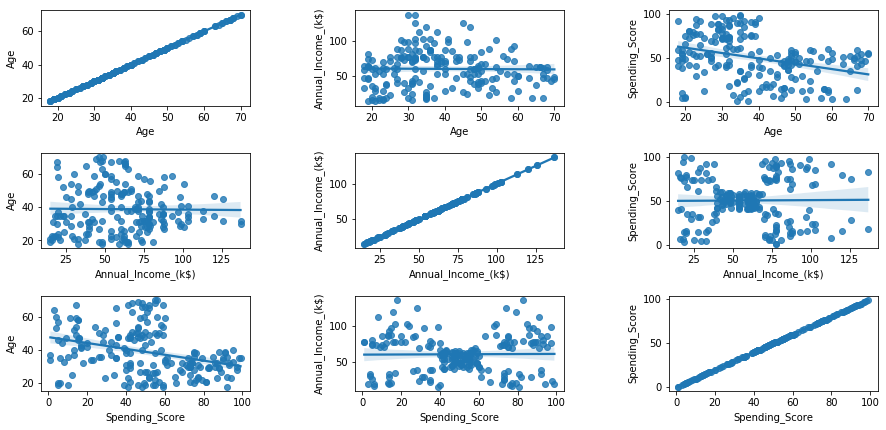

In [8]:
plt.figure(1 , figsize = (15 , 7))
n = 0 
for x in ['Age' , 'Annual_Income_(k$)' , 'Spending_Score']:
    for y in ['Age' , 'Annual_Income_(k$)' , 'Spending_Score']:
        n += 1
        plt.subplot(3 , 3 , n)
        plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
        sns.regplot(x = x , y = y , data = data)
        plt.ylabel(y.split()[0]+' '+y.split()[1] if len(y.split()) > 1 else y )
plt.show()

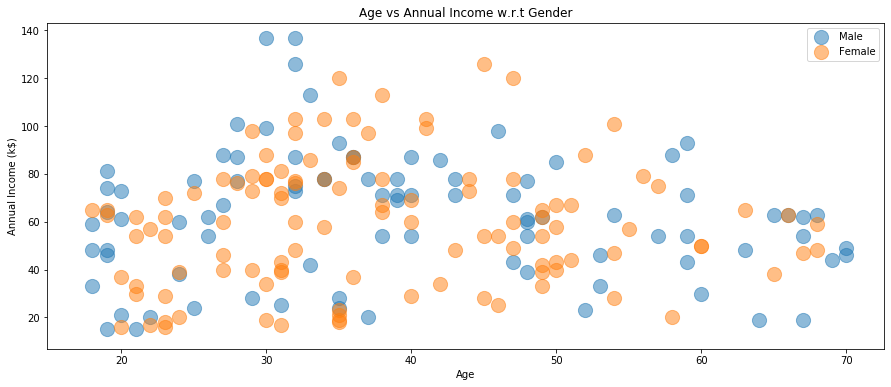

In [9]:
plt.figure(1 , figsize = (15 , 6))
for gender in ['Male' , 'Female']:
    plt.scatter(x = 'Age' , y = 'Annual_Income_(k$)' , 
                data = data[data['Gender'] == gender] ,
                s = 200 , alpha = 0.5 , label = gender)
plt.xlabel('Age'), plt.ylabel('Annual Income (k$)') 
plt.title('Age vs Annual Income w.r.t Gender')
plt.legend()
plt.show()

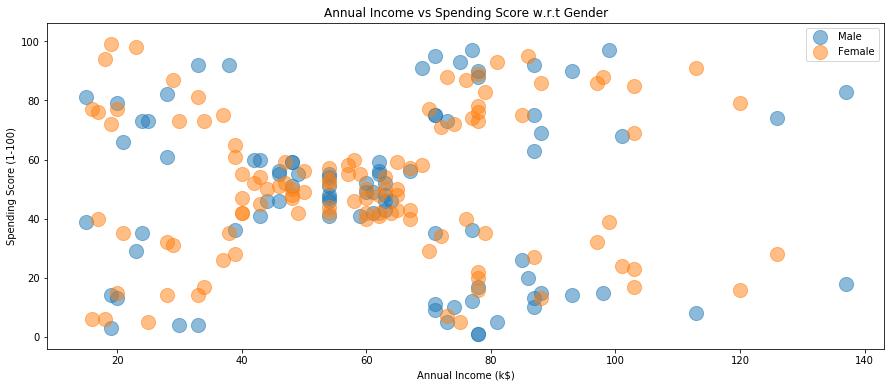

In [10]:
plt.figure(1 , figsize = (15 , 6))
for gender in ['Male' , 'Female']:
    plt.scatter(x = 'Annual_Income_(k$)',y = 'Spending_Score' ,
                data = data[data['Gender'] == gender] ,s = 200 , alpha = 0.5 , label = gender)
plt.xlabel('Annual Income (k$)'), plt.ylabel('Spending Score (1-100)') 
plt.title('Annual Income vs Spending Score w.r.t Gender')
plt.legend()
plt.show()

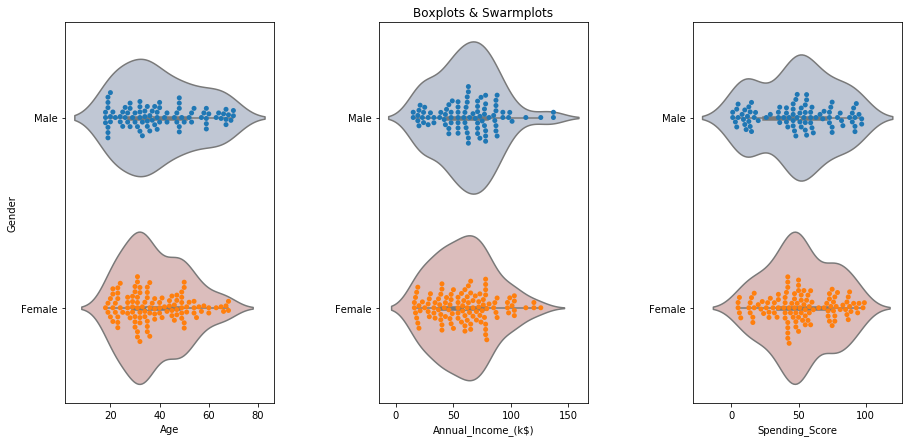

In [11]:
plt.figure(1 , figsize = (15 , 7))
n = 0 
for cols in ['Age' , 'Annual_Income_(k$)' , 'Spending_Score']:
    n += 1 
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    sns.violinplot(x = cols , y = 'Gender' , data = data , 
                   palette = 'vlag')
    sns.swarmplot(x = cols , y = 'Gender' , data = data)
    plt.ylabel('Gender' if n == 1 else '')
    plt.title('Boxplots & Swarmplots' if n == 2 else '')
plt.show()

### Clustering using K- means
#### 1.Segmentation using Age and Spending Score

In [12]:
from sklearn.cluster import KMeans

In [13]:
'''Age and spending Score'''
X1 = data[['Age' , 'Spending_Score']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(X1)
    inertia.append(algorithm.inertia_)

In [14]:
# X1

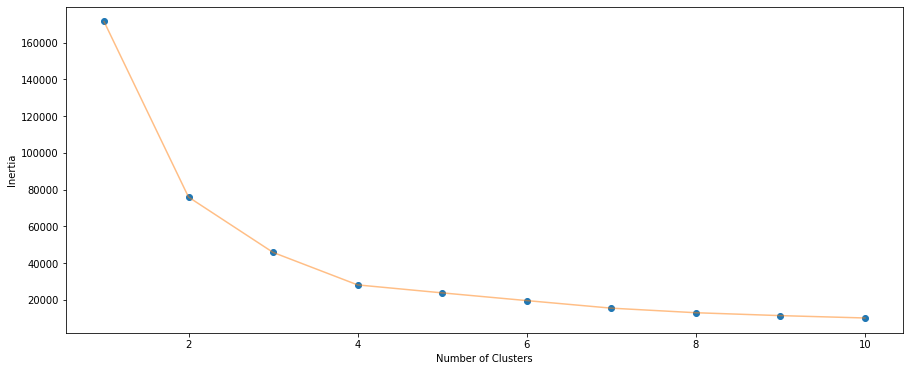

In [15]:
# Elbow plot using np.arange
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

In [16]:
algorithm = KMeans(n_clusters = 4 ,init='k-means++', random_state= 42 )
t = algorithm.fit_predict(X1)
labels1 = algorithm.labels_
centroids1 = algorithm.cluster_centers_

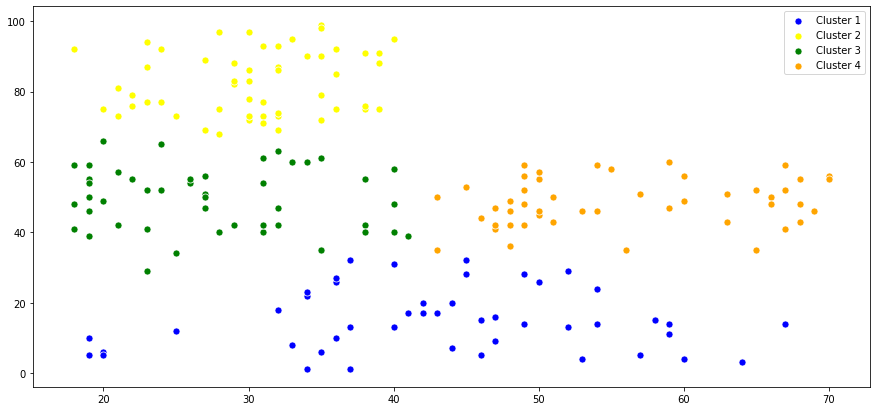

In [17]:
plt.figure(1 , figsize = (15 , 7) )
plt.clf()
sns.scatterplot(X1[t==0, 0], X1[t==0,1],
               color='blue', label='Cluster 1', s=50)
sns.scatterplot(X1[t==1, 0], X1[t==1,1],
               color='yellow', label='Cluster 2', s=50)
sns.scatterplot(X1[t==2, 0], X1[t==2,1],
               color='green', label='Cluster 3', s=50)
sns.scatterplot(X1[t==3, 0], X1[t==3,1],
               color='orange', label='Cluster 4', s=50)

##### 2. Using only Spending_Score and income variable for easy visualization

In [18]:
temp1 = data.iloc[:, [2,3]].values

In [19]:
# Using elbow method for optimal number of clusters using WCSS method

In [20]:
wcss = []
for i in range(1,10):
    km = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    km.fit(temp1)
    wcss.append(km.inertia_)

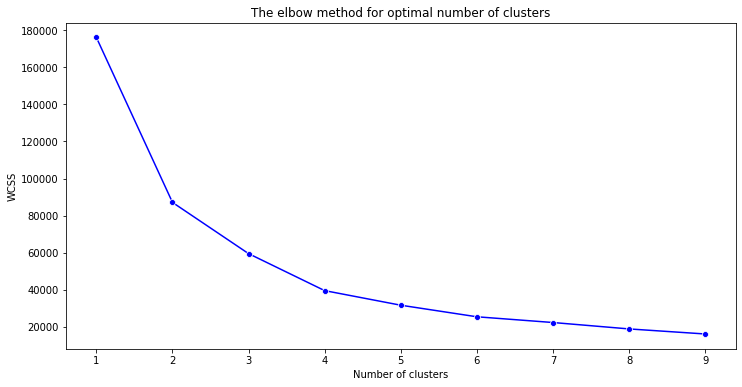

In [21]:
plt.figure(figsize=(12,6))
sns.lineplot(range(1,10), wcss, marker='o', color='blue')
plt.title('The elbow method for optimal number of clusters')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

##### As we can see, 5 is the number of optimal clusters

In [22]:
# Fitting the k-means to the dataset using 5 cluster points
final_km = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = final_km.fit_predict(temp1)

### Visualization

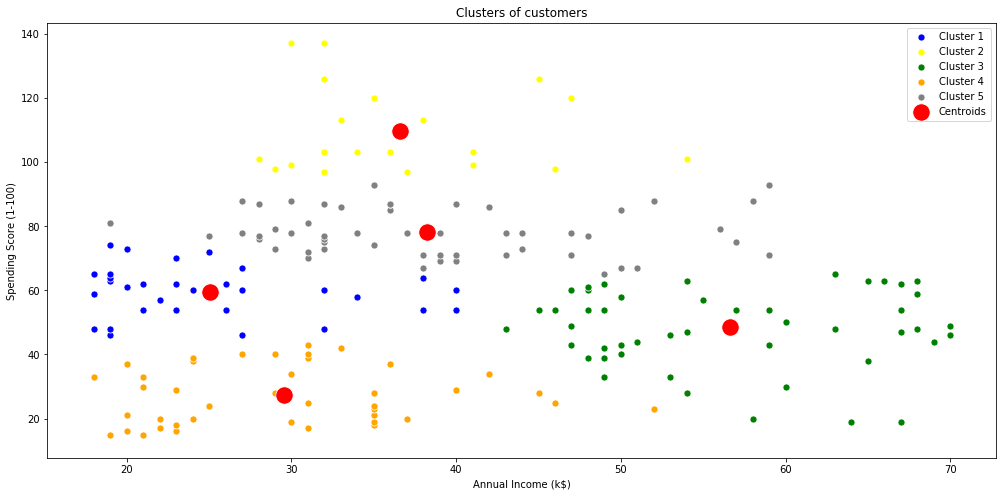

In [23]:
# Visualization of clusters
plt.figure(figsize=(17,8))
sns.scatterplot(temp1[y_kmeans==0, 0], temp1[y_kmeans == 0, 1], 
                color='blue', label="Cluster 1", s=50)
sns.scatterplot(temp1[y_kmeans==1, 0], temp1[y_kmeans == 1, 1], 
                color='yellow', label="Cluster 2", s=50)
sns.scatterplot(temp1[y_kmeans==2, 0], temp1[y_kmeans == 2, 1], 
                color='green', label="Cluster 3", s=50)
sns.scatterplot(temp1[y_kmeans==3, 0], temp1[y_kmeans == 3, 1], 
                color='orange', label="Cluster 4", s=50)
sns.scatterplot(temp1[y_kmeans==4, 0], temp1[y_kmeans == 4, 1], 
                color='grey', label="Cluster 5", s=50)
sns.scatterplot(final_km.cluster_centers_[:, 0],
               final_km.cluster_centers_[:, 1],
               color="red", label="Centroids",s=300, markers = ',')
plt.grid(False)
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()